# LAPTOP PRICE PREDICTOR

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
lap_data = pd.read_csv("laptops_data_.csv")

In [3]:
lap_data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
lap_data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
lap_data.shape

(1303, 12)

In [6]:
lap_data.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

# Checking the datatype of columns

In [7]:
lap_data.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

# checking for null values

In [8]:
lap_data.isnull().sum()

Unnamed: 0           0
Company              0
TypeName             0
Inches              11
ScreenResolution     0
Cpu                  0
Ram                 10
Memory               0
Gpu                  0
OpSys                0
Weight               0
Price                0
dtype: int64

# checking for duplicate values

In [9]:
lap_data.duplicated().sum()

0

# Dropping the unnamed column

In [10]:
lap_data.drop(columns=["Unnamed: 0"], inplace=True)

In [11]:
lap_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Dealing with mixed variables

In [12]:
lap_data["Ram"] = lap_data["Ram"].str.replace("GB","")
lap_data["Weight"] = lap_data["Weight"].str.replace("kg","")

In [13]:
lap_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# Exploring the data for imputation

In [14]:
lap_data["Company"].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [15]:
lap_data["TypeName"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [16]:
lap_data["Inches"].value_counts()

15.6    661
14.0    193
13.3    163
17.3    163
12.5     38
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [17]:
lap_data["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [18]:
lap_data["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [19]:
lap_data["Ram"].value_counts()

8     616
4     369
16    199
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

In [20]:
lap_data["Gpu"].value_counts()

Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, Length: 106, dtype: int64

In [21]:
lap_data["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [22]:
lap_data["Weight"].value_counts()

2.2     121
2.1      58
2.4      44
2.3      41
2.5      38
       ... 
3.25      1
4.7       1
1.55      1
1.18      1
4.0       1
Name: Weight, Length: 179, dtype: int64

In [23]:
lap_data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

# Imputation in Ram column

In [24]:
pd.crosstab(lap_data["Company"],lap_data["Ram"])

Ram,12,16,2,24,32,4,6,64,8
Company,,,,,,,,,
Acer,3,4,3,0,0,56,3,0,33
Apple,0,4,0,0,0,1,0,0,16
Asus,5,35,4,2,3,44,2,1,61
Chuwi,0,0,0,0,0,2,1,0,0
Dell,5,54,3,0,7,63,4,0,159
Fujitsu,0,0,0,0,0,1,0,0,2
Google,0,1,0,0,0,0,0,0,2
HP,6,13,5,0,0,87,18,0,142
Huawei,0,0,0,0,0,0,0,0,2


In [25]:
lap_data["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [26]:
# Company wise imputation in Ram 
for com in lap_data["Company"].unique():
    companywise_data = lap_data[lap_data["Company"]==com].copy()
    companywise_data["Ram"].replace(np.nan, companywise_data["Ram"].mode().iloc[0], inplace=True)
    lap_data.update(companywise_data)

In [27]:
lap_data.isnull().sum()

Company              0
TypeName             0
Inches              11
ScreenResolution     0
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys                0
Weight               0
Price                0
dtype: int64

In [28]:
lap_data["Ram"].mode()

0    8
Name: Ram, dtype: object

In [29]:
pd.crosstab(lap_data["Company"],lap_data["Inches"])

Inches,10.1,11.3,11.6,12.0,12.3,12.5,13.0,13.3,13.5,13.9,14.0,14.1,15.0,15.4,15.6,17.0,17.3,18.4
Company,,,,,,,,,,,,,,,,,,
Acer,0,0,9,0,0,0,0,6,0,0,13,0,0,0,66,0,9,0
Apple,0,0,1,6,0,0,0,10,0,0,0,0,0,4,0,0,0,0
Asus,0,0,6,0,0,3,0,13,0,0,19,1,0,0,73,0,41,0
Chuwi,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0
Dell,0,0,4,0,0,8,0,48,0,0,20,0,1,0,186,0,28,0
Fujitsu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
Google,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
HP,0,0,7,0,0,15,0,39,0,0,46,0,0,0,129,1,35,0
Huawei,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0


# Imputation in Inches Column

In [30]:
for com in lap_data["Company"].unique():
    companywise_data = lap_data[lap_data["Company"]==com].copy()
    companywise_data["Inches"].replace(np.nan, companywise_data["Inches"].mode().iloc[0], inplace=True)
    lap_data.update(companywise_data)

In [31]:
lap_data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [32]:
# This is our dataset after imputation
lap_data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [33]:
# making a copy of the dataframe to check the distribution
lap_data2 = pd.read_csv("laptops_data_.csv")

In [35]:
# Now we will make datafraems for counts (before imputation and after imputation) and concatenate them
ram_counts1 = lap_data["Ram"].value_counts().to_frame('Count after')


In [36]:
ram_counts1

,Count after
8,625
4,370
16,199
6,41
12,25
2,22
32,17
24,3
64,1


In [37]:
# making index same 
lap_data2["Ram"] = lap_data2["Ram"].str.replace("GB","")
lap_data2['Ram'] = pd.to_numeric(lap_data2['Ram'], errors='coerce')

In [38]:
ram_counts2 = lap_data2["Ram"].value_counts().to_frame('Count before')

In [39]:
ram_counts2

,Count before
8.0,616
4.0,369
16.0,199
6.0,41
12.0,25
2.0,22
32.0,17
24.0,3
64.0,1


In [40]:
ram_counts12= pd.concat([ram_counts1,ram_counts2],axis=1)
ram_counts12=ram_counts12.rename(columns={'Ram': 'Count_before', 'Count': 'Count_after'})
ram_counts12

,Count after,Count before
8,625.0,NaN
4,370.0,NaN
16,199.0,NaN
6,41.0,NaN
12,25.0,NaN
2,22.0,NaN
32,17.0,NaN
24,3.0,NaN
64,1.0,NaN
8.0,NaN,616.0


In [41]:
ram_counts12.index

Index([ '8',  '4', '16',  '6', '12',  '2', '32', '24', '64',  8.0,  4.0, 16.0,
        6.0, 12.0,  2.0, 32.0, 24.0, 64.0],
      dtype='object')

# Checking the distribution of data after imputation and before imputation

<AxesSubplot:>

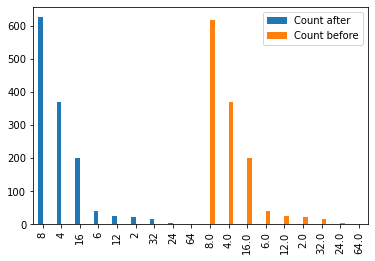

In [42]:
ram_counts12.plot(kind="bar")

Summary Statistics:
count    1303.000000
mean       15.023715
std         1.422093
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.400000
Name: Inches, dtype: float64


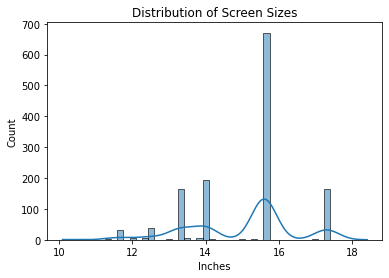

10.757435931154209
19.28999307882253


In [43]:
print("Summary Statistics:")
print(lap_data['Inches'].describe())

# Visualize the data
import seaborn as sns
sns.histplot(lap_data['Inches'], bins=50, kde=True)
plt.title('Distribution of Screen Sizes')
plt.show()
# Check for outliers using Z-score method
mean = lap_data['Inches'].mean()
std_dev = lap_data['Inches'].std()

lower_bound = mean-3*std_dev
upper_bound = mean+3*std_dev
print(lower_bound)
print(upper_bound)


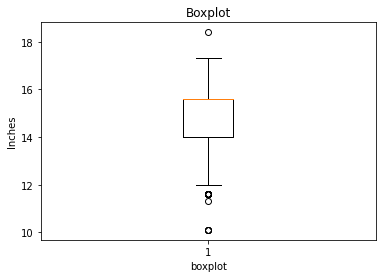

In [44]:

plt.boxplot(lap_data["Inches"])

# Add labels and title
plt.xlabel('boxplot')
plt.ylabel('Inches')
plt.title('Boxplot')

# Show the plot
plt.show()

# EDA(Exloratory Data Analysis)

In [45]:
lap_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [46]:
lap_data.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.023715,59870.042910
std,1.422093,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [47]:
lap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [48]:
#Displot is a function in Python's Seaborn library,it is used to create informative and attractive statistical graphics.
#There are various types of plot in displot like bar or hist, 

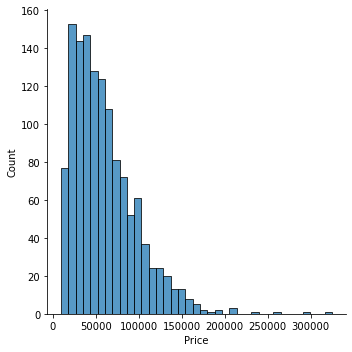

In [49]:
#we will make barplot on price
import seaborn as sns
sns.displot(lap_data["Price"])
#here the data is little skewed i.e very few laptops price is high and many laptops have low prices. 
#And it is obvious as very few can afford costly

<AxesSubplot:>

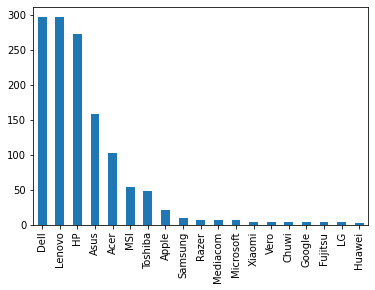

In [50]:
#well make barplot on count of laptop wrt comapny
lap_data["Company"].value_counts().plot(kind="bar") #companies like dell,lenovo and HP have large share of laptops

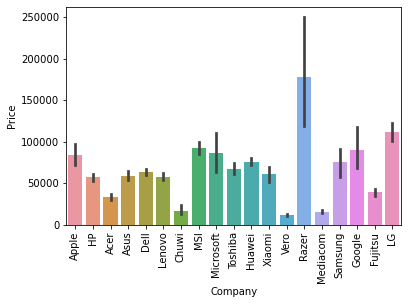

In [51]:
# we'll see the relation between prices and comapmy name
sns.barplot(x =lap_data["Company"], y = lap_data["Price"])
plt.xticks(rotation = "vertical")
plt.show()#observing this, prices vary with comapny name, price depends on company

<AxesSubplot:>

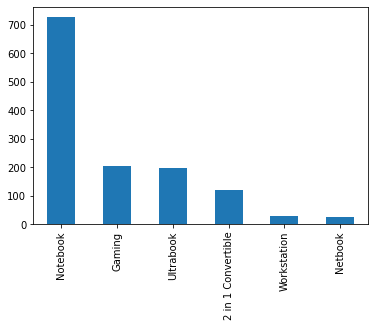

In [52]:
#how many types of laptop are there, well see the count
lap_data["TypeName"].value_counts().plot(kind="bar")#6 types of laptop, there notebook is highly sold, as in budget

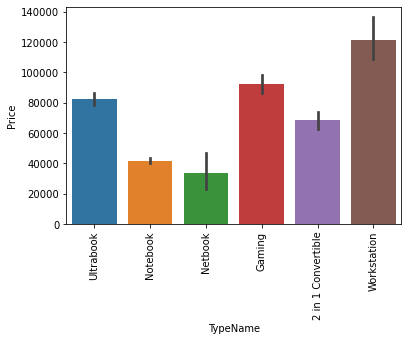

In [53]:
# now we'll see the relation of price with laptop type
sns.barplot(x =lap_data["TypeName"], y = lap_data["Price"])
plt.xticks(rotation = "vertical")
plt.show()#prices also vary with the type

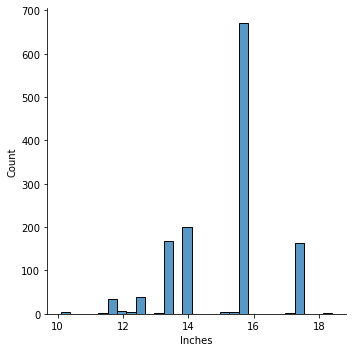

In [54]:
# now we'll come to the inches column, will see no of laptops wrt inches
sns.displot(lap_data['Inches'])#three spikes are there

<AxesSubplot:xlabel='Inches', ylabel='Price'>

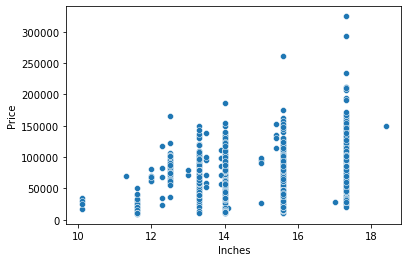

In [55]:
sns.scatterplot(x=lap_data["Inches"],y=lap_data["Price"])#As prices vary with increase of size,little correlation, not vary strong

In [ ]:
#boxplot

In [56]:
# Let's move to next column Screen Resolution

# Feature Engineering

In [57]:
lap_data["ScreenResolution"].value_counts()
#this column has lot of information in complex way, like laptop is touchscreen or not, like Ips panel is present or not

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [58]:
#we'll make another column named touchscreen having values 0 and 1
lap_data["Touchscreen"] = lap_data["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [59]:
lap_data.sample(5)
#here touchscreen column is added

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
525,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,2.02,71395.200,0
887,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2,72988.272,0
125,HP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,No OS,1.86,13799.520,0
1069,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8,256GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920,69264.000,0
627,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,No OS,2.2,24935.040,0


In [60]:
#now we'll see counts of laptop having touchscreen or without touchscreen
lap_data["Touchscreen"].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

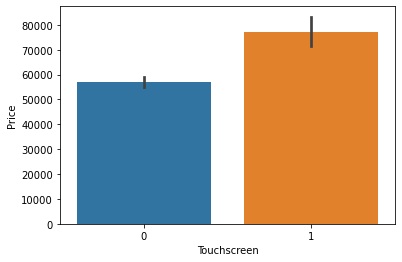

In [61]:
#now we'll see the relation between touchscreen laptpos with price
sns.barplot(x=lap_data["Touchscreen"], y=lap_data["Price"]) # Obviously Touchscreen affects the prices

In [62]:
#Same we'll do for IPS Panel
lap_data["Ips"] = lap_data["ScreenResolution"].apply(lambda x:1 if "IPS Panel" in x else 0)

In [63]:
# again we'll see the counts of laptop with IPs or without Ips
lap_data["Ips"].value_counts()

0    938
1    365
Name: Ips, dtype: int64

<AxesSubplot:>

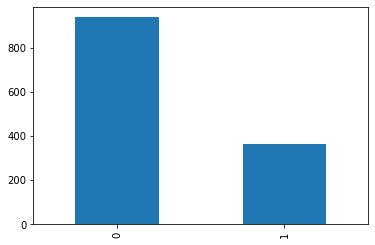

In [64]:
lap_data["Ips"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Ips', ylabel='Price'>

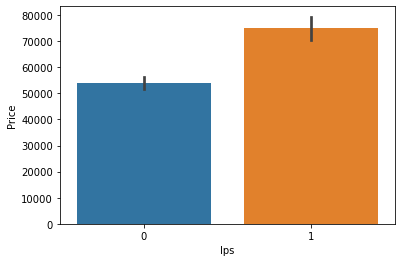

In [65]:
# will see the relation with prices
sns.barplot(x=lap_data["Ips"], y=lap_data["Price"])#IPS display also affects the prices 

In [66]:
# Screen resolution column also contains x and y resolution for this we'll extract x and y resolution, split it where"x"present
temp_new = lap_data["ScreenResolution"].str.split("x",n=1,expand = True)
temp_new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [67]:
# now make two columns for x_res and y_reso
lap_data["X_res"]=temp_new[0]
lap_data["Y_res"]=temp_new[1]


In [68]:
lap_data.sample(5)
#Here 4 columns from Screen resolution has been added

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1138,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.72,0,0,Full HD 1920,1080
997,Acer,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,500GB HDD,Intel HD Graphics 505,Windows 10,2.4,20246.40,0,0,1366,768
1153,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Windows 10,2.62,63882.72,0,0,Full HD 1920,1080
100,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon 530,Windows 10,1.91,38308.32,0,0,Full HD 1920,1080
45,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.0GHz,8,256GB SSD,Intel Iris Graphics 540,macOS,1.37,75604.32,0,1,IPS Panel Retina Display 2560,1600


In [69]:
#Now y_res is OK but we have to extract x_resolution value from x_res 
#we convert x_res to string then replace "," with "",then find numbers from the x_res string
lap_data["X_res"] = lap_data["X_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
lap_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [70]:
# Now we'll convert the x_res and y_res to int data type
lap_data["X_res"] = lap_data["X_res"].astype("int")
lap_data["Y_res"] = lap_data["Y_res"].astype("int")

In [71]:
lap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 142.6+ KB


In [72]:
#Will convert Ram to int
lap_data["Ram"] = lap_data["Ram"].astype("int")

In [73]:
lap_data.corr()["Price"] #correlation of columns with prices

Inches         0.070150
Ram            0.741050
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [74]:
lap_data["ppi"] = (((lap_data["X_res"]**2) + (lap_data["Y_res"]**2))**0.5/lap_data["Inches"]).astype("float")
print(lap_data.head())

  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS   1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS   1.34   47895.5232            0    0

In [75]:
lap_data.corr()["Price"]# the correlation with ppi is good

Inches         0.070150
Ram            0.741050
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473090
Name: Price, dtype: float64

In [76]:
#drop screen resolution, X_res, Y_res, Inches
lap_data.drop(columns=["ScreenResolution", "X_res", "Y_res", "Inches"],inplace=True)
print(lap_data.head())

  Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS   1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS   1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS   1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS   1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS   1.37   96095.8080            0    1   

          ppi  
0  226.983005  
1  127.677940  
2 

In [77]:
#Now we'll come to the Cpu column, checking the values here lot of values
lap_data["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [78]:
#just to explore this 
lap_data["Cpu"].sample(10)

281      Intel Core i3 6006U 2.0GHz
618     Intel Core i7 7700HQ 2.8GHz
1003     Intel Core i5 7200U 2.5GHz
211     Intel Core i7 7700HQ 2.8GHz
557      Intel Core i7 7500U 2.7GHz
83        AMD A6-Series 9220 2.5GHz
764        Intel Core i3 6006U 2GHz
729         AMD A9-Series 9420 3GHz
845      Intel Core i7 7500U 2.7GHz
1008     Intel Core i5 7200U 2.5GHz
Name: Cpu, dtype: object

In [79]:
#making a new column "Cpu Name" to extract first three columns
lap_data["Cpu Name"] = lap_data["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [80]:
lap_data.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
1097,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.6,85194.7200,0,0,127.335675,Intel Core i7
154,HP,Ultrabook,Intel Core i5 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.48,57648.9600,0,0,157.350512,Intel Core i5
571,HP,Notebook,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,1.94,20725.9200,0,0,111.935204,Intel Pentium Quad
135,HP,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.63,52640.6400,0,0,157.350512,Intel Core i7
149,Acer,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.1,23816.1600,0,0,100.454670,Intel Core i3
75,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2,50562.7200,0,0,141.211998,Intel Core i7
1044,HP,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.54,53280.0000,0,0,157.350512,Intel Core i5
462,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,39906.7200,0,0,141.211998,Intel Core i5
819,Dell,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.76,40226.4000,0,0,111.935204,Intel Core i5
1106,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.9,80516.2032,0,0,127.335675,Intel Core i7


In [81]:
#make more generalize
def fetch_processor(text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [82]:
#now we'll apply the above function on this column
lap_data["Cpu brand"] = lap_data["Cpu Name"].apply(fetch_processor)

In [83]:
lap_data.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
18,Lenovo,Notebook,Intel Core i3 7100U 2.4GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.2,26586.7200,0,0,141.211998,Intel Core i3,Intel Core i3
348,Asus,2 in 1 Convertible,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5,19980.0000,1,0,135.094211,Intel Celeron Dual,Other Intel Processor
1204,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.2,62284.3200,0,0,141.211998,Intel Core i7,Intel Core i7
1112,Lenovo,Notebook,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.1,22857.1200,0,0,100.454670,Intel Core i3,Intel Core i3
226,Dell,Notebook,Intel Core i7 7500U 2.7GHz,16,1TB HDD,AMD Radeon R7 M445,Windows 10,2.3,45768.0528,1,0,141.211998,Intel Core i7,Intel Core i7
1070,Dell,Notebook,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.06,25679.8944,0,0,100.454670,Intel Core i3,Intel Core i3
1153,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Windows 10,2.62,63882.7200,0,0,141.211998,Intel Core i7,Intel Core i7
784,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.7,122490.7200,0,0,157.350512,Intel Core i7,Intel Core i7
742,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,81784.8000,1,1,157.350512,Intel Core i5,Intel Core i5
656,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.2,48964.3200,0,0,141.211998,Intel Core i7,Intel Core i7


<AxesSubplot:>

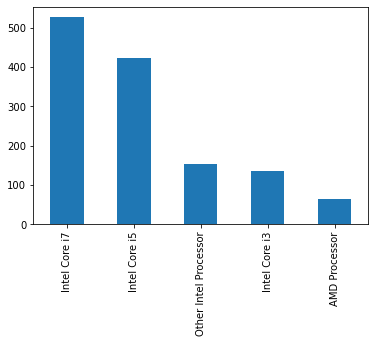

In [84]:
lap_data["Cpu brand"].value_counts().plot(kind="bar") #hence price depends on processor

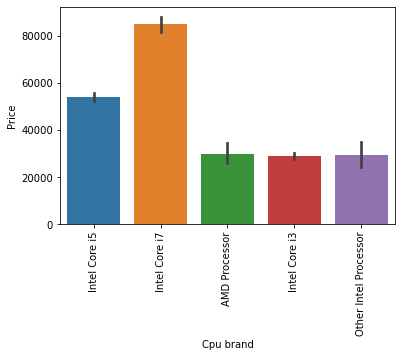

In [85]:
# checking the relation with price
sns.barplot(x=lap_data["Cpu brand"], y=lap_data["Price"])
plt.xticks(rotation="vertical")
plt.show()#prices vary with processor prices high for i7 processor

In [86]:
lap_data.drop(columns=["Cpu", "Cpu brand"], inplace=True)

<AxesSubplot:>

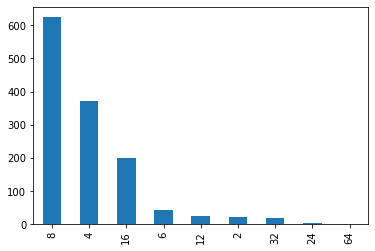

In [87]:
# now we'll come to Ram column
lap_data["Ram"].value_counts().plot(kind="bar")#people buy more 8GB laptops that means budget laptop

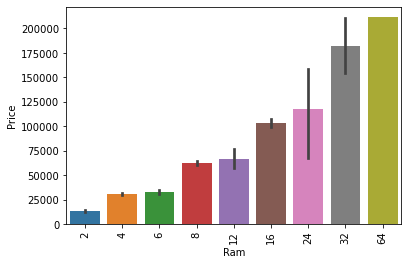

In [88]:
sns.barplot(x=lap_data["Ram"], y = lap_data["Price"])
plt.xticks(rotation="vertical")
plt.show()#high correlation with price jaise jaise ram bad raha hai prices badh raha hai

In [89]:
# Now we ll come to memeory column, there is also lot of info available
lap_data["Memory"].value_counts()
#we'll transform this column, will make 4 columns SSD,HDD,FLASH STORAGE, HYBRID

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [90]:
lap_data["Memory"] = lap_data["Memory"].astype(str).replace("\.0","",regex = True)
lap_data["Memory"] = lap_data["Memory"].str.replace("GB","")
lap_data["Memory"] = lap_data["Memory"].str.replace("TB","000")
new = lap_data["Memory"].str.split("+",n=1,expand=True)

lap_data["first"] = new[0]
lap_data["first"] = lap_data["first"].str.strip()
lap_data["second"] = new[1]

lap_data["Layer1HDD"] = lap_data["first"].apply(lambda x:1 if "HDD" in x else 0)
lap_data["Layer1SSD"] = lap_data["first"].apply(lambda x:1 if "SSD" in x else 0)
lap_data["Layer1Hybrid"] = lap_data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
lap_data["Layer1Flash_Storage"] = lap_data["first"].apply(lambda x:1 if "Flash Storage" in x else 0)
lap_data["first"] = lap_data["first"].str.replace(r'\D', "")

lap_data["second"].fillna("0", inplace=True)
lap_data["Layer2HDD"] = lap_data["second"].apply(lambda x:1 if "HDD" in x else 0)
lap_data["Layer2SSD"] = lap_data["second"].apply(lambda x:1 if "SSD" in x else 0)
lap_data["Layer2Hybrid"] = lap_data["second"].apply(lambda x:1 if "Hybrid" in x else 0)
lap_data["Layer2Flash_Storage"] = lap_data["second"].apply(lambda x:1 if "Flash Storage" in x else 0)
lap_data["second"] = lap_data["second"].str.replace(r'\D', "")


C:\Users\banba\AppData\Local\Temp\ipykernel_5784\564302277.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  lap_data["first"] = lap_data["first"].str.replace(r'\D', "")
C:\Users\banba\AppData\Local\Temp\ipykernel_5784\564302277.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  lap_data["second"] = lap_data["second"].str.replace(r'\D', "")


In [91]:
lap_data["first"] = lap_data["first"].astype(int)
lap_data["second"] = lap_data["second"].astype(int)
lap_data["HDD"] = (lap_data["first"]*lap_data["Layer1HDD"]+lap_data["second"]*lap_data["Layer2HDD"])
lap_data["SSD"] = (lap_data["first"]*lap_data["Layer1SSD"]+lap_data["second"]*lap_data["Layer2SSD"])
lap_data["Hybrid"] = (lap_data["first"]*lap_data["Layer1Hybrid"]+lap_data["second"]*lap_data["Layer2Hybrid"])
lap_data["Flash Storage"] = (lap_data["first"]*lap_data["Layer1Flash_Storage"]+lap_data["second"]*lap_data["Layer2Flash_Storage"])
lap_data.drop(columns=["first","second","Layer1HDD", "Layer1SSD","Layer1Hybrid","Layer1Flash_Storage","Layer2HDD", "Layer2SSD","Layer2Hybrid","Layer2Flash_Storage"], inplace=True)

In [92]:
lap_data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [93]:
lap_data.drop(columns=["Memory"], inplace=True)

In [94]:
lap_data.corr()["Price"]

Ram              0.741050
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473090
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
#facetted plots

In [95]:
#The correlation of the columns with prices, here with hybrid, Flash storage and HDD the correlatoin is very less 

In [96]:
# so well drop these columns 
lap_data.drop(columns=["Hybrid", "Flash Storage"], inplace=True)

In [97]:
# Now well come to graphical processing unit Gpu having lot of values(basically graphics card)
lap_data["Gpu"].value_counts()

Intel HD Graphics 620      282
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
ARM Mali T860 MP4            1
Name: Gpu, Length: 106, dtype: int64

In [98]:
lap_data["Gpu_brand"] = lap_data["Gpu"].apply(lambda x:x.split()[0])
print(lap_data["Gpu_brand"].value_counts())

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64


In [99]:
print(lap_data[lap_data["Gpu_brand"]=="ARM"])

      Company            TypeName  Ram                Gpu      OpSys Weight  \
1191  Samsung  2 in 1 Convertible    4  ARM Mali T860 MP4  Chrome OS   1.15   

         Price  Touchscreen  Ips       ppi                Cpu Name  HDD  SSD  \
1191  35111.52            1    1  234.5074  Samsung Cortex A72&A53    0    0   

     Gpu_brand  
1191       ARM  


In [100]:
#since there is only one brand named "ARM" so well drop this
lap_data = lap_data[lap_data["Gpu_brand"] != "ARM"]

In [101]:
#counting latops with diffrent Graphic processor
lap_data["Gpu_brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

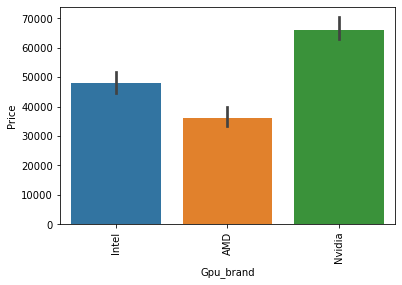

In [102]:
# checking relationship with price
sns.barplot(x=lap_data["Gpu_brand"], y=lap_data["Price"], estimator=np.median)
plt.xticks(rotation="vertical")
plt.show()

In [103]:
lap_data["OpSys"].value_counts()# there are lot of categories so we'll make less categories basically make generalize this

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

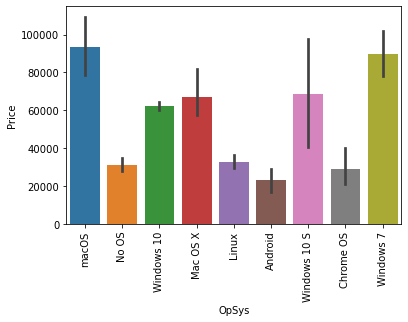

In [104]:
# lete check before relation with price
sns.barplot(x=lap_data["OpSys"], y=lap_data["Price"])
plt.xticks(rotation="vertical")
plt.show()
# here we will make 3 categories

In [105]:
def cat_os(inp):
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 S":
        return "Windows"
    elif inp == "macOS" or inp == "Mac OS X":
        return "Mac"
    else:
        return "Others/No OS/Linux"
     

In [106]:
# now we will apply the cat_os on "OS"
lap_data['OS'] = lap_data["OpSys"].apply(cat_os)

C:\Users\banba\AppData\Local\Temp\ipykernel_5784\3291732497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_data['OS'] = lap_data["OpSys"].apply(cat_os)


In [107]:
lap_data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Others/No OS/Linux'), Text(2, 0, 'Windows')])

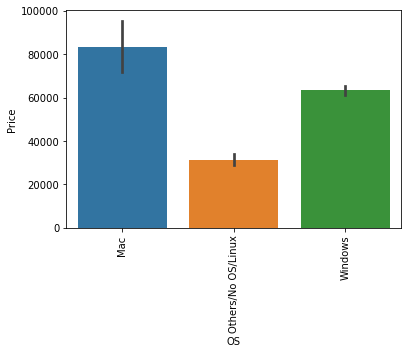

In [108]:
#checking the replation with price
sns.barplot(x=lap_data["OS"], y=lap_data["Price"])
plt.xticks(rotation="vertical")

In [109]:
lap_data["Weight"] = lap_data["Weight"].astype("float")

C:\Users\banba\AppData\Local\Temp\ipykernel_5784\3844869252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap_data["Weight"] = lap_data["Weight"].astype("float")


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

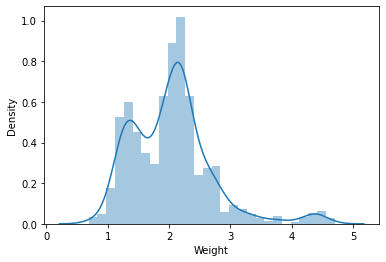

In [110]:
sns.distplot(lap_data["Weight"])#fairly normal but bimodal

<AxesSubplot:xlabel='Weight', ylabel='Price'>

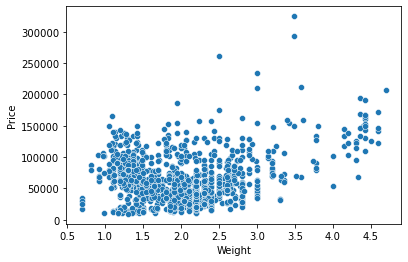

In [111]:
sns.scatterplot(x=lap_data["Weight"], y=lap_data["Price"])# weak correlation relation

In [112]:
lap_data.corr()["Price"]

Ram            0.740947
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.474973
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

In [113]:
#Now we'll check the correlation betweeen the features(check multicollinearity), The multicollinearity is common issue in regression
lap_data.corr()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383384,0.740947,0.114969,0.205942,0.300702,0.095742,0.600897
Weight,0.383384,1.000000,0.209867,-0.293004,0.018643,-0.320269,0.514147,-0.063818
Price,0.740947,0.209867,1.000000,0.192917,0.253320,0.474973,-0.096891,0.670660
Touchscreen,0.114969,-0.293004,0.192917,1.000000,0.148026,0.459438,-0.208766,0.257577
Ips,0.205942,0.018643,0.253320,0.148026,1.000000,0.298043,-0.093588,0.225311
ppi,0.300702,-0.320269,0.474973,0.459438,0.298043,1.000000,-0.293587,0.509496
HDD,0.095742,0.514147,-0.096891,-0.208766,-0.093588,-0.293587,1.000000,-0.400750
SSD,0.600897,-0.063818,0.670660,0.257577,0.225311,0.509496,-0.400750,1.000000


<AxesSubplot:>

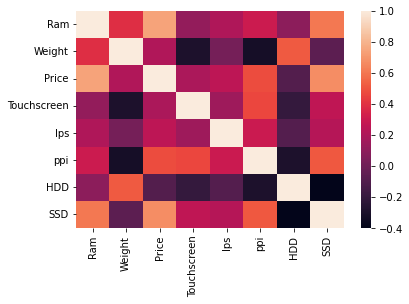

In [114]:
#lets try more better way, visualise it, if there is whiteish colour then there is red flag
sns.heatmap(lap_data.corr())

In [115]:
# so there is not much high correlation between independent variables. so no multicollinearity 

In [ ]:
# now we will make the model for predicting the prices.